In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/Ardavaa/GDG-feature-eng-data-prep/refs/heads/main/dataset-penugasan/MBP.csv')
df.head(10)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
5,"POCO M4 5G (Power Black, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
6,"POCO C55 (Power Black, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
7,"POCO C55 (Forest Green, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
8,"POCO C55 (Cool Blue, 128 GB)",4.1,"13,647",6 GB RAM,128 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹9,249",2023-06-17
9,"POCO M4 5G (Yellow, 128 GB)",4.2,"40,525",6 GB RAM,128 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹13,999",2023-06-17


delete unnecessary columns

In [73]:
cols_to_remove = ['Date of Scraping']
df.drop(cols_to_remove, axis=1, inplace=True)
df.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649"
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999"
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749"
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
dtypes: float64(1), object(9)
memory usage: 143.6+ KB


In [75]:
df.rename(columns={'Phone Name': 'Phone'}, inplace=True)
df.rename(columns={'ROM/Storage': 'ROM'}, inplace=True)
df.rename(columns={'Back/Rare Camera': 'Main Camera'}, inplace=True)
df.rename(columns={'Rating ?/5': 'Rating'}, inplace=True)
df.head()


,Phone,Rating,Number of Ratings,RAM,ROM,Main Camera,Front Camera,Battery,Processor,Price in INR
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649"
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999"
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749"
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"


Data Cleaning

In [76]:
df.duplicated().sum()

69

In [77]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [78]:
df.isna().sum()

,0
Phone,0
Rating,0
Number of Ratings,0
RAM,0
ROM,162
Main Camera,8
Front Camera,381
Battery,9
Processor,49
Price in INR,0


In [79]:
df.dropna(inplace=True)
df.isna().sum()

,0
Phone,0
Rating,0
Number of Ratings,0
RAM,0
ROM,0
Main Camera,0
Front Camera,0
Battery,0
Processor,0
Price in INR,0


In [80]:
df['Price in INR'].value_counts()

,count
Price in INR,
"₹9,999",43
"₹11,999",40
"₹13,999",40
"₹10,999",37
"₹17,999",36
...,...
"₹9,989",1
"₹17,690",1
"₹31,989",1


In [81]:
df['RAM'].value_counts()

,count
RAM,
4 GB RAM,341
8 GB RAM,338
6 GB RAM,265
3 GB RAM,153
2 GB RAM,90
12 GB RAM,46
1 GB RAM,12
512 MB RAM,4
8 MB RAM,1


In [82]:
ram_to_remove = ["1.5 GB RAM", "16 MB RAM", "8 MB RAM", "1 GB RAM", "512 MB RAM"]
df = df[~df['RAM'].isin(ram_to_remove)]
df['RAM'].value_counts()

,count
RAM,
4 GB RAM,341
8 GB RAM,338
6 GB RAM,265
3 GB RAM,153
2 GB RAM,90
12 GB RAM,46


In [83]:
df['RAM'] = df['RAM'].str.split().str[0].astype(int)
df['RAM'].value_counts()

,count
RAM,
4,341
8,338
6,265
3,153
2,90
12,46


In [84]:
df['ROM'] = df['ROM'].str.split().str[0].astype(int)
df['ROM'].value_counts()

,count
ROM,
128,541
64,355
32,179
256,126
16,26
512,4
8,2


In [85]:
df['Main Camera'] = df['Main Camera'].str.split().str[0].str.replace('MP', '').str.replace('Mp', '')
df['Main Camera'] = df['Main Camera'].str.replace('12.2', '12').str.replace('12.3', '12').astype(int)
df['Main Camera'].head()

,Main Camera
0,8
1,50
2,8
3,50
4,8


In [86]:
df.head()

,Phone,Rating,Number of Ratings,RAM,ROM,Main Camera,Front Camera,Battery,Processor,Price in INR
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2,32,8,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649"
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4,64,50,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999"
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4,64,8,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4,64,50,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749"
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4,64,8,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"


In [87]:
df['Front Camera'] = df['Front Camera'].str.split().str[0].str.replace('MP', '')
df['Front Camera'] = df['Front Camera'].str.replace('0.3', '1').str.replace('1.3', '1').str.replace('10.8', '10').astype(int)
df['Front Camera'].value_counts()

,count
Front Camera,
16,336
8,301
5,249
32,111
13,70
20,70
50,22
10,17
44,16


In [88]:
df['Battery'] = df['Battery'].str.split().str[0].astype(int)
df['Battery'].value_counts()

,count
Battery,
5000,667
4000,90
4500,80
6000,79
4300,30
...,...
2150,1
2610,1
4350,1


In [89]:
df['Number of Ratings'] = df['Number of Ratings'].str.replace(',', '').astype(int)
df['Rating'] = df['Rating'].apply(pd.to_numeric, errors='coerce')
df['Price in INR'] = df['Price in INR'].str.replace('₹', '').str.replace(',', '').astype(int)
# df['RAM'] = df['RAM'].str.split().str[0]
# df['ROM'] = df['ROM'].str.split().str[0]
# df['RAM'] = df['RAM'].astype(int)
# df['ROM'] = df['ROM'].str.split().str[0]
# df['ROM'] = df['ROM'].astype(int)

df.head()

,Phone,Rating,Number of Ratings,RAM,ROM,Main Camera,Front Camera,Battery,Processor,Price in INR
0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561,2,32,8,5,5000,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128,4,64,50,8,5000,Mediatek Dimensity 700 Processor,11999
2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175,4,64,8,5,5000,Helio G36 Processor,6999
3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621,4,64,50,5,5000,Mediatek Helio G85 Processor,7749
4,"POCO C51 (Power Black, 64 GB)",4.3,15175,4,64,8,5,5000,Helio G36 Processor,6999


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1233 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone              1233 non-null   object 
 1   Rating             1233 non-null   float64
 2   Number of Ratings  1233 non-null   int64  
 3   RAM                1233 non-null   int64  
 4   ROM                1233 non-null   int64  
 5   Main Camera        1233 non-null   int64  
 6   Front Camera       1233 non-null   int64  
 7   Battery            1233 non-null   int64  
 8   Processor          1233 non-null   object 
 9   Price in INR       1233 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 106.0+ KB


Data Cleaning

check data duplicate

In [91]:
df.isna().sum()

,0
Phone,0
Rating,0
Number of Ratings,0
RAM,0
ROM,0
Main Camera,0
Front Camera,0
Battery,0
Processor,0
Price in INR,0


menanmpilakan

In [92]:
df[df.isna()]

,Phone,Rating,Number of Ratings,RAM,ROM,Main Camera,Front Camera,Battery,Processor,Price in INR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df.dropna(inplace = True)
df.isna().sum()

,0
Phone,0
Rating,0
Number of Ratings,0
RAM,0
ROM,0
Main Camera,0
Front Camera,0
Battery,0
Processor,0
Price in INR,0


visualized data

<Axes: xlabel='Phone'>

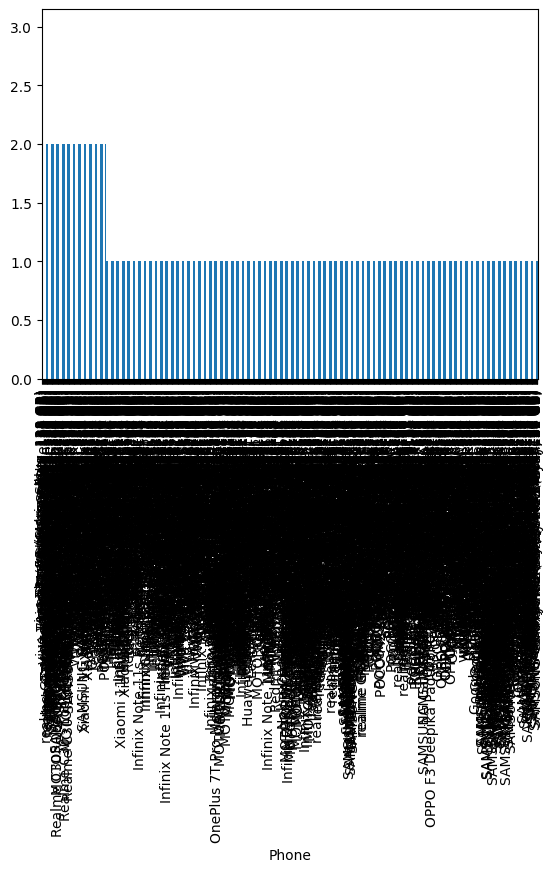

In [94]:
df['Phone'].value_counts().plot(kind='bar')

In [95]:
# df['Phone'] = df['Phone'].str.split().str[0]
# df['Phone'].value_counts().plot(kind='bar')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1233 entries, 0 to 1835
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone              1233 non-null   object 
 1   Rating             1233 non-null   float64
 2   Number of Ratings  1233 non-null   int64  
 3   RAM                1233 non-null   int64  
 4   ROM                1233 non-null   int64  
 5   Main Camera        1233 non-null   int64  
 6   Front Camera       1233 non-null   int64  
 7   Battery            1233 non-null   int64  
 8   Processor          1233 non-null   object 
 9   Price in INR       1233 non-null   int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 138.2+ KB


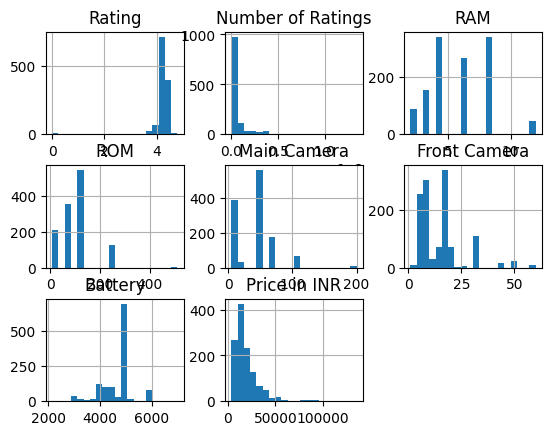

In [97]:
data_hist = ['Rating', 'Number of Ratings', 'RAM', 'ROM', 'Main Camera', 'Front Camera', 'Battery', 'Price in INR']
df[data_hist].hist(bins=20)
plt.show()

In [98]:
df.isna().sum()

,0
Phone,0
Rating,0
Number of Ratings,0
RAM,0
ROM,0
Main Camera,0
Front Camera,0
Battery,0
Processor,0
Price in INR,0


In [99]:
df[data_hist].skew()

,0
Rating,-8.703299
Number of Ratings,3.999117
RAM,0.571420
ROM,1.477526
Main Camera,1.467017
Front Camera,1.796977
Battery,-0.732273
Price in INR,3.292185


In [110]:
sns.displot(np.log(df['Price in INR']))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (<ipython-input-110-73ed49de2d98>, line 1)

split data into train and test

In [101]:
df.head()

,Phone,Rating,Number of Ratings,RAM,ROM,Main Camera,Front Camera,Battery,Processor,Price in INR
0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561,2,32,8,5,5000,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128,4,64,50,8,5000,Mediatek Dimensity 700 Processor,11999
2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175,4,64,8,5,5000,Helio G36 Processor,6999
3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621,4,64,50,5,5000,Mediatek Helio G85 Processor,7749
4,"POCO C51 (Power Black, 64 GB)",4.3,15175,4,64,8,5,5000,Helio G36 Processor,6999


In [102]:
from sklearn.model_selection import train_test_split

X = df.drop('Phone', axis=1)
y= df['Phone']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((986, 9), (247, 9), (986,), (247,))

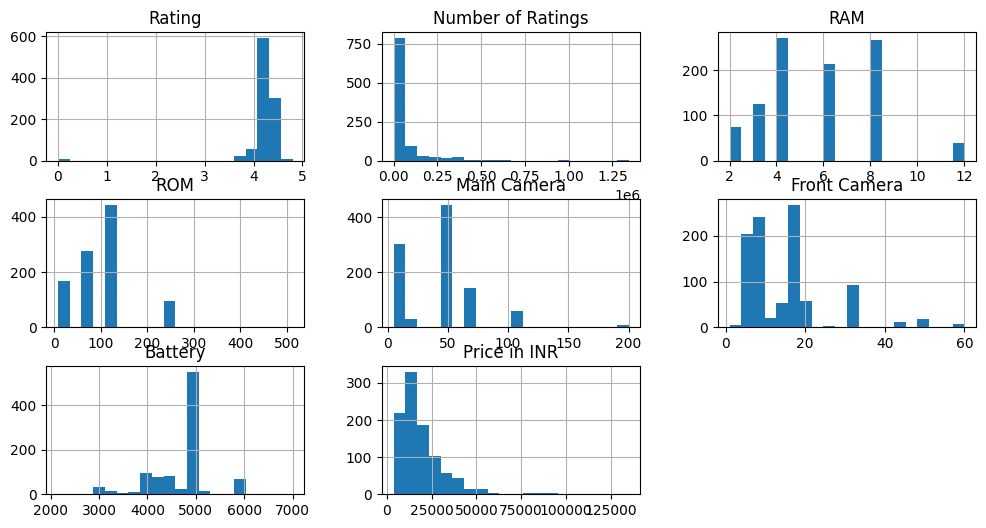

In [103]:
X_train[data_hist].hist(bins=20, figsize=(12, 6))
plt.show()

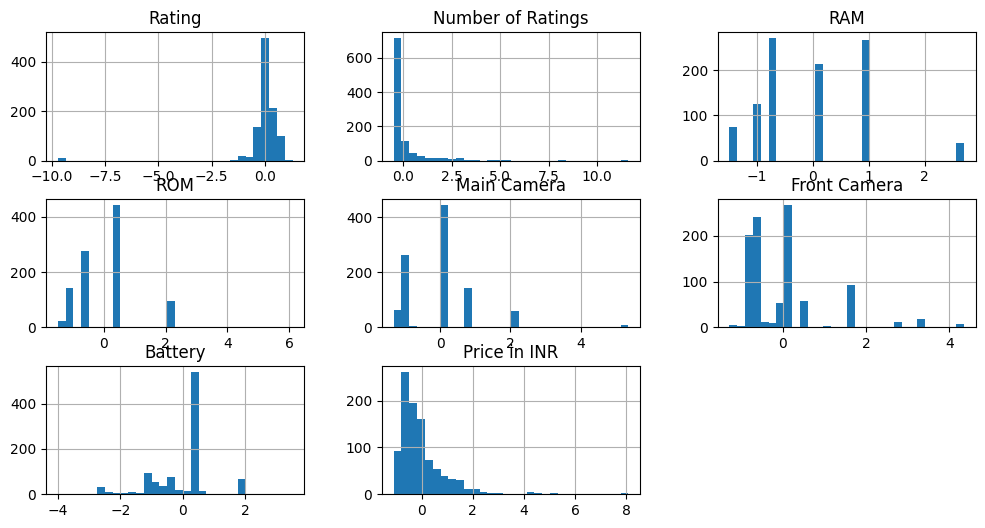

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[data_hist] = scaler.fit_transform(X_train[data_hist])
X_test[data_hist] = scaler.transform(X_test[data_hist])

X_train[data_hist].hist(bins= 30, figsize=(12, 6))
plt.show()

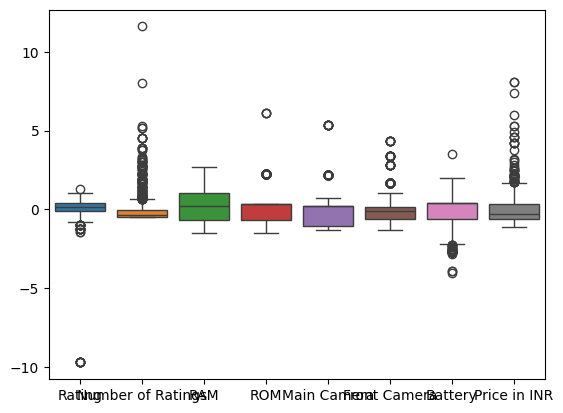

In [105]:
sns.boxplot(data=X_train[data_hist])
plt.show()

i will keep it because i think this is important

In [114]:
print("Train missing data:", X_train.isna().sum().sum(), "\nTest missing data:", X_test.isna().sum().sum())
print()
print("Train duplicated data:", X_train.duplicated().sum(), "\nTest duplicated data:", X_test.duplicated().sum())

Train missing data: 0 
Test missing data: 0

Train duplicated data: 0 
Test duplicated data: 23


In [113]:
X_train.drop_duplicates(inplace=True)
X_train.duplicated().sum()

0

In [115]:
X_test.drop_duplicates(inplace=True)
X_test.duplicated().sum()

0

In [116]:
print("Train missing data:", X_train.isna().sum().sum(), "\nTest missing data:", X_test.isna().sum().sum())
print()
print("Train duplicated data:", X_train.duplicated().sum(), "\nTest duplicated data:", X_test.duplicated().sum())

Train missing data: 0 
Test missing data: 0

Train duplicated data: 0 
Test duplicated data: 0
